In [94]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [29]:
def val_prob(test_val, sample_size, num_samps, data_size, num_sims):
    count = 0
    for i in range(num_sims):
        marbles = set()
        for j in range(num_samps):
            draw = [random.randint(0, data_size) for _ in range(sample_size)]
            marbles.update(draw)
        if len(marbles) == test_val:
            count += 1
    return count / num_sims

In [71]:
def sim_dist(sample_size, num_samps, data_size, num_sims):
    res = []
    for i in range(num_sims):
        marbles = set()
        for j in range(num_samps):
            draw = [random.randint(0, data_size) for _ in range(sample_size)] #random.sample(range(0, data_size), sample_size) 
            marbles.update(draw)
        res.append(len(marbles))
    return res

In [58]:
val_prob(55, 5, 20, 100, 10000)

0.0026

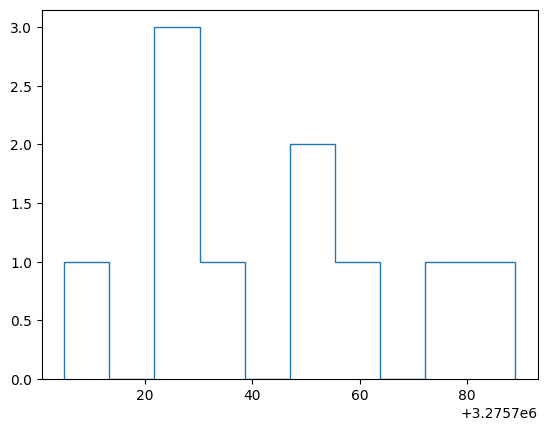

In [ ]:
x = sim_dist(1024*40*8, 10, 5_000_000_000, 10)
counts, bins = np.histogram(x)
plt.stairs(counts, bins)

In [78]:
bins

array([3275705. , 3275713.4, 3275721.8, 3275730.2, 3275738.6, 3275747. ,
       3275755.4, 3275763.8, 3275772.2, 3275780.6, 3275789. ])

In [80]:
counts

array([1, 0, 3, 1, 0, 2, 1, 0, 1, 1])

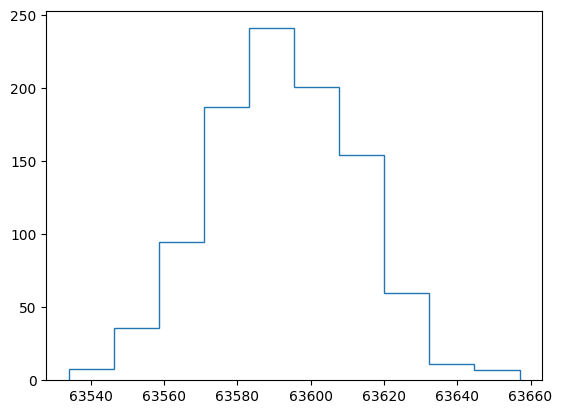

In [88]:
x = sim_dist(64, 1000, 100_000, 1000)
counts, bins = np.histogram(x)
plt.stairs(counts, bins)

In [142]:
x = list(range(1000))
samp_size = 3
data_size = 100
y = [np.array(sim_dist(samp_size, samps, data_size, 1)).mean() for samps in tqdm(x)]

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2181.30it/s]


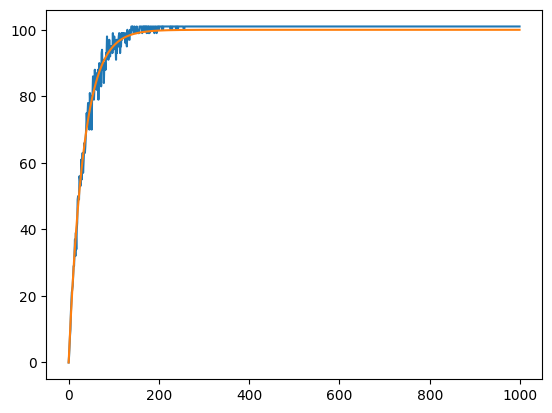

In [143]:
plt.plot(x,y)
plt.plot(x, data_size*(1-(1-samp_size/data_size)**(np.array(x))))